## Ch2. Numpy Numerical Calculation

### 0. Introduction

NumPy(Numerical Python)是Python语言的一个扩展程序库，支持大量的维度数组与矩阵运算，此外也针对数组运算提供大量的数学函数库。NumPy的前身Numeric最早是由 Jim Hugunin与其它协作者共同开发，2005年，Travis Oliphant在Numeric中结合了另一个同性质的程序库Numarray的特色，并加入了其它扩展而开发了NumPy。 NumPy为开放源代码并且由许多协作者共同维护开发。本章将为大家介绍python中nmupy库的使用，我们主要将其用于数值计算，包括：

1. 一个强大的N维数组对象 ndarray
2. 广播功能函数
3. 整合 C/C++/Fortran 代码的工具
4. 线性代数、傅里叶变换、随机数生成等功能

NumPy通常与SciPy（Scientific Python）和Matplotlib（绘图库）一起使用，这种组合广泛用于替代MatLab，是一个强大的科学计算环境，有助于我们通过Python学习数据科学或者机器学习。

### 1. Numpy的优势以及为什么要使用Numpy

#### 1.1 Python循环

在python中，循环操作是十分费时的，涉及到大规模的循环操作，会导致程序运行十分缓慢。我们以下面一个求100万个数的倒数的程序为例。我们首先使用for循环来实现，来看看程序的运行性能。我们可以使用`%timeit`来统计运行时间，它是ipython中统计运行时间的魔术方法，通过多次运行取平均值的方式来实现。

In [2]:
def compute_reciprocals(values):
    res = []
    for value in values:
        res.append(1 / value)
    return res


values = list(range(1, 1000000))

%timeit compute_reciprocals(values)

76.1 ms ± 831 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


我们看到，使用python的for循环程序运行较为缓慢，这是因为在循环中每遍历到一个元素，python就要判断它的类型并查找适用于该数据类型的正确的操作方式。为了更直观的为大家提供一个对比，我们使用numpy来实现相同的功能并计算其运行时间。

In [3]:
import numpy as np  # 导入numpy 

values = np.arange(1, 1000000)

%timeit 1 /values

1.95 ms ± 53.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


可以看到实现相同的计算，我们使用numpy的运行速度是python循环的几十倍。所以，numpy的优势就在于它可以向量化操作，使得需要大量for循环的运算的速度大大提升。

#### 1.2 为什么numpy如此高校

Numpy的底层是C语言实现的，其实其内部计算仍然是for循环，但是C语言的for循环的运行速度要远远快于python，C在执行时代码整体编译，速度更快。此外，numpy数组是连续的单一类型储存，与分散的多变类型储存相比，这种存储结构与一些更加高效的底层处理方式更加的契合。而且Python语言在执行时有线程锁，无法实现真正的多线程并行，但是C语言可以。

#### 1.3 应该在什么时候使用numpy？

当我们在python中，需要也能用大量的for循环才能实现的向量化、矩阵化操作时，我们就需要优先考虑使用Numpy。

### 2. Numpy常规数组

`numpy.ndarray`是numpy中重要的专用类，它能够方便快捷的处理n维数组。与基于列表或`array`类的python方法相比，`ndarray`具有如下的特点：

1. ndarray具有内建的维度
2. ndarray对象是不可变的，其长度大小固定
3. 整个数组内只允许拥有一种数据类型

#### 2.1 Numpy常规数组的创建

Numpy为我们提供了多种创建数组的方式，我们可以使用多样的接口来灵活的创建我们所需要的多维数组。

##### 2.1.1 从列表开始创建

In [4]:
x = np.array([1, 2, 3, 4, 5, 6])
x

array([1, 2, 3, 4, 5, 6])

In [5]:
type(x)

numpy.ndarray

可以看到通过`np.array`方法创建的数组的数据类型为`numpy.ndarray`。在创建数组的过程中我们可以通过`dtype`参数来指定数组的数据类型

In [7]:
x = np.array([1, 2, 3, 4, 5, 6], dtype='float32')
type(x[0])

numpy.float32

我们可以通过多维列表的形式来创建多维数组，只需要在`np.array`中传入多维列表即可

In [8]:
x = np.array(
    [
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 9],
    ]
)
x

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

##### 2.1.2 通过实例化ndarray对象创建数组

Numpy中为我们提供了各种常用的矩阵数组的对象类型，我们可以通过直接实例化相关对象的方式来快速的创建我们所需的多维数组。

1. 创建一个所有元素全都是0的矩阵

In [9]:
x = np.zeros(shape=(5, 5), dtype='float32')
x

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]], dtype=float32)

2. 创建一个所有值都是1的矩阵

In [10]:
x = np.ones(shape=(5, 5), dtype='float32')
x

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]], dtype=float32)

3. 创建一个单位矩阵

In [12]:
x = np.eye(3)
x

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

4. 创建一个所有位置的值全都一致的矩阵

In [13]:
x = np.full((3, 4), 4.5)
x

array([[4.5, 4.5, 4.5, 4.5],
       [4.5, 4.5, 4.5, 4.5],
       [4.5, 4.5, 4.5, 4.5]])

5. 创建一个与目标数组形状一致，值全部为0的数组

In [14]:
y = np.zeros_like(x)
y

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

6. 创建一个与目标数组形状一致，值全部为1的数组

In [15]:
y = np.ones_like(x)
y

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

7. 创建具有特定数据分布的数组

除了规定的形状的一些常用数组，我们还可以方便的生成具有特定数据分布的数组，numpy依然为我们提供了易于使用的接口。

- 创建一个线性序列数组，步长为2

In [17]:
x = np.arange(1, 15, 2)
x

array([ 1,  3,  5,  7,  9, 11, 13])

- 创建一个均匀分布的数组

In [18]:
x = np.linspace(0, 1, 4)
x

array([0.        , 0.33333333, 0.66666667, 1.        ])

- 创建一个lg分布的数组，等比数列

In [19]:
x = np.logspace(0, 9, 10)
x

array([1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07,
       1.e+08, 1.e+09])

- 创建一个在0~1之间随机均匀分布的数组

In [20]:
x = np.random.random((3, 3))
x

array([[0.71857801, 0.48944732, 0.88292336],
       [0.40261572, 0.95263665, 0.56675313],
       [0.31273015, 0.19218281, 0.05108257]])

- 创建一个符合标准正态分布的随机数数组

In [21]:
x = np.random.normal(0, 1, (3, 3))
x

array([[-2.5614564 ,  0.79586196,  0.42111676],
       [ 0.09859233, -0.01271687, -0.3173927 ],
       [ 2.67134469,  0.58334699, -0.53536362]])

- 创建一个随机整数构成的数组

In [22]:
x = np.random.randint(0, 10, (3, 3))
x

array([[6, 7, 9],
       [3, 1, 5],
       [2, 7, 6]])

#### 2.2 Numpy常规数组的采样与重排列

在一些情境下，我们需要对数据进行随机采样或者随机的重排列来模拟或者获取随机性，numpy也为我们提供了一系列的方法来快捷地进行随机采样与重排列操作。

##### 2.2.1 Numpy常规数组的重排列

In [23]:
x = np.array([1, 2, 3, 4, 5, 6])
np.random.permutation(x)  # 产生一个新的列表

array([1, 4, 5, 2, 6, 3])

##### 2.2.2 Numpy常规数组的随机采样

1. 按指定形状采样

In [24]:
x = np.arange(10, 25)
x

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24])

In [25]:
np.random.choice(x, size=(3, 4))

array([[13, 18, 24, 13],
       [17, 13, 13, 20],
       [17, 16, 10, 22]])

2. 按照指定概率采样

In [26]:
np.random.choice(x, size=(3, 4), p=(x / np.sum(x)))

array([[13, 23, 22, 20],
       [17, 19, 11, 24],
       [13, 24, 22, 12]])

#### 2.3 Numpy数组的性质与Numpy数组元素的访问

##### 2.3.1 Numpy数组的元属性

In [29]:
x = np.random.randint(1, 15, (3, 4))
x

array([[ 1,  4, 14,  7],
       [ 2,  7,  7,  1],
       [ 5, 14,  5, 10]])

1. 查看数组的形状

In [30]:
x.shape

(3, 4)

2. 查看数组的维度

In [31]:
x.ndim

2

3. 查看数组的大小（元素个数）

In [32]:
x.size

12

4. 查看数组的类型

In [33]:
x.dtype

dtype('int32')

##### 2.3.2 数组的索引

1. 一维数组的索引与列表的索引方式一致

In [37]:
x = np.linspace(1, 10, 8)
x

array([ 1.        ,  2.28571429,  3.57142857,  4.85714286,  6.14285714,
        7.42857143,  8.71428571, 10.        ])

In [38]:
x[0]

1.0

In [39]:
x[-1]

10.0

2. 多维数组的索引——以二维数组为例

In [44]:
x = np.random.randint(1, 10, (3, 4))
x

array([[9, 9, 1, 8],
       [9, 2, 9, 4],
       [3, 7, 9, 9]])

In [45]:
x[0, 0]

9

In [46]:
x[1][2]

9

In [47]:
x[2][0] = 5.678
x

array([[9, 9, 1, 8],
       [9, 2, 9, 4],
       [5, 7, 9, 9]])

注意numpy中数组的数据类型是固定的，向一个整数类型的数组中插入一个浮点数类型，浮点数类型会向下取整

##### 2.3.3 数组的切片

1. 一维数组的切片——与列表的操作一致

In [48]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [49]:
x[:3]

array([0, 1, 2])

In [50]:
x[3:]

array([3, 4, 5, 6, 7, 8, 9])

In [51]:
x[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

2. 多维数组的索引——以二维数组为例

In [52]:
x = np.random.randint(1, 15, (3, 4))
x

array([[ 1,  1,  7,  3],
       [11, 12, 14,  4],
       [ 9,  2,  3,  6]])

In [53]:
x[:2, :3]

array([[ 1,  1,  7],
       [11, 12, 14]])

In [54]:
x[:2, 0:3:2]

array([[ 1,  7],
       [11, 14]])

In [55]:
x[::-1, ::-1]

array([[ 6,  3,  2,  9],
       [ 4, 14, 12, 11],
       [ 3,  7,  1,  1]])

3. 获取数组的行和列

In [56]:
x[1, :]

array([11, 12, 14,  4])

In [57]:
x[1]

array([11, 12, 14,  4])

In [58]:
x[:, 2]

array([ 7, 14,  3])

需要注意的一点是，当我们在对数组进行切片操作时，numpy返回的是数组的一个视图而非副本，当我们在对视图进行修改时，相应的原数组也会发生改变

In [59]:
x = np.random.randint(1, 15, (6, 8))
x

array([[ 9,  5,  4,  2, 12, 14,  4,  2],
       [14, 13,  7, 10,  7, 11, 13,  9],
       [ 7,  3,  6,  8, 12,  1,  8, 10],
       [ 2,  6,  2,  2,  1,  5,  9, 10],
       [ 4,  2,  7,  3,  4,  1, 12,  4],
       [ 8,  6,  9,  6, 14, 12, 11,  8]])

In [60]:
x1 = x[:2, :2]
x1

array([[ 9,  5],
       [14, 13]])

In [62]:
x1[0][0] = 0
x1

array([[ 0,  5],
       [14, 13]])

In [63]:
x

array([[ 0,  5,  4,  2, 12, 14,  4,  2],
       [14, 13,  7, 10,  7, 11, 13,  9],
       [ 7,  3,  6,  8, 12,  1,  8, 10],
       [ 2,  6,  2,  2,  1,  5,  9, 10],
       [ 4,  2,  7,  3,  4,  1, 12,  4],
       [ 8,  6,  9,  6, 14, 12, 11,  8]])

因此为了安全地进行操作，我们建议在操作的时候使用`copy`创建一个数组的安全副本。

In [64]:
x1 = x[:2, :2].copy()
x1

array([[ 0,  5],
       [14, 13]])

In [65]:
x1[1][1] = 0
x1

array([[ 0,  5],
       [14,  0]])

In [66]:
x

array([[ 0,  5,  4,  2, 12, 14,  4,  2],
       [14, 13,  7, 10,  7, 11, 13,  9],
       [ 7,  3,  6,  8, 12,  1,  8, 10],
       [ 2,  6,  2,  2,  1,  5,  9, 10],
       [ 4,  2,  7,  3,  4,  1, 12,  4],
       [ 8,  6,  9,  6, 14, 12, 11,  8]])

#### 2.4 数组的形状的操作

当我们需要改变数组的形状的时候，我们可以使用`reshape`与`ravel`等方法。

##### 2.4.1 使用reshape进行操作

In [67]:
x = np.random.randint(1, 15, (3, 4))
x

array([[ 4, 10,  7,  3],
       [ 3, 14,  4, 12],
       [ 9, 10,  5, 11]])

In [69]:
x = x.reshape(2, 6)
x

array([[ 4, 10,  7,  3,  3, 14],
       [ 4, 12,  9, 10,  5, 11]])

注意改变数组的形状时必须保证数组中的元素的个数一致。`reshape`操作返回的是一个视图而不是副本

##### 2.4.2 数组的展平

在numpy中我们可以使用`flatten`与`ravel`方法来将多维数组展开成一维数组。需要注意的是`flatten`返回的是副本，而`ravel`返回的是一个视图

In [70]:
x = np.random.randint(1, 15, (5, 6))
x

array([[14,  8,  7,  4,  7, 12],
       [ 5, 10,  8,  1, 14, 14],
       [ 8,  2,  6, 10,  1, 11],
       [ 5,  6, 14,  4,  5, 14],
       [13, 14, 13,  7,  1,  9]])

In [71]:
x1 = x.flatten()
x1

array([14,  8,  7,  4,  7, 12,  5, 10,  8,  1, 14, 14,  8,  2,  6, 10,  1,
       11,  5,  6, 14,  4,  5, 14, 13, 14, 13,  7,  1,  9])

In [72]:
x2 = x.ravel()
x2

array([14,  8,  7,  4,  7, 12,  5, 10,  8,  1, 14, 14,  8,  2,  6, 10,  1,
       11,  5,  6, 14,  4,  5, 14, 13, 14, 13,  7,  1,  9])

In [74]:
x[0] = 1

In [75]:
x

array([[ 1,  1,  1,  1,  1,  1],
       [ 5, 10,  8,  1, 14, 14],
       [ 8,  2,  6, 10,  1, 11],
       [ 5,  6, 14,  4,  5, 14],
       [13, 14, 13,  7,  1,  9]])

#### 2.4 数组的拼接操作

在很多情况下我们需要对数组进行拼接，比如需要更新数组数据等。Numpy中提供了两种操作方式——水平拼接与垂直拼接， 需要注意的是，数组的拼接操作返回的都是副本而非视图。

In [77]:
x1 = np.random.randint(1, 12, (3, 4))
x2 = np.random.randint(1, 15, (3, 4))
x1, x2

(array([[6, 9, 5, 3],
        [5, 2, 7, 1],
        [4, 5, 6, 4]]),
 array([[13,  1,  7, 14],
        [ 8,  7,  3,  1],
        [ 2,  5,  3, 14]]))

##### 2.4.1 水平拼接

In [78]:
x = np.hstack([x1, x2])
x

array([[ 6,  9,  5,  3, 13,  1,  7, 14],
       [ 5,  2,  7,  1,  8,  7,  3,  1],
       [ 4,  5,  6,  4,  2,  5,  3, 14]])

##### 2.4.2 垂直拼接

In [79]:
x = np.vstack([x1, x2])
x

array([[ 6,  9,  5,  3],
       [ 5,  2,  7,  1],
       [ 4,  5,  6,  4],
       [13,  1,  7, 14],
       [ 8,  7,  3,  1],
       [ 2,  5,  3, 14]])

#### 2.5 数组的分割

Numpy也为我们提供了方便的数组分割操作的接口。

##### 2.5.1 split方法

In [80]:
x = np.random.randint(1, 15, 10)
x

array([ 7, 11,  9, 13,  7,  8,  8,  8,  9, 14])

In [81]:
x1, x2, x3 = np.split(x, [2, 6])
x1, x2, x3

(array([ 7, 11]), array([ 9, 13,  7,  8]), array([ 8,  8,  9, 14]))

##### 2.5.2 水平分割的hsplit方法

In [84]:
x = np.arange(0, 25).reshape((5, 5))
x

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [85]:
left, middle, right = np.hsplit(x, [1, 2])
left, middle, right

(array([[ 0],
        [ 5],
        [10],
        [15],
        [20]]),
 array([[ 1],
        [ 6],
        [11],
        [16],
        [21]]),
 array([[ 2,  3,  4],
        [ 7,  8,  9],
        [12, 13, 14],
        [17, 18, 19],
        [22, 23, 24]]))

##### 2.5.3 垂直分割vsplit的用法

In [86]:
upper, middle, lower = np.vsplit(x, [2, 3])
upper, middle, lower

(array([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]]),
 array([[10, 11, 12, 13, 14]]),
 array([[15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24]]))

#### 2.7 使用Numpy进行数值运算

##### 2.7.1 使用Numpy进行向量化运算

1. 四则运算——加减乘除

In [87]:
x = np.arange(1, 26)
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25])

In [88]:
x + 2

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27])

In [89]:
x * 4

array([  4,   8,  12,  16,  20,  24,  28,  32,  36,  40,  44,  48,  52,
        56,  60,  64,  68,  72,  76,  80,  84,  88,  92,  96, 100])

In [90]:
x - 3

array([-2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,
       15, 16, 17, 18, 19, 20, 21, 22])

In [91]:
x / 2

array([ 0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,
        6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. ,
       11.5, 12. , 12.5])

In [92]:
x ** 2

array([  1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121, 144, 169,
       196, 225, 256, 289, 324, 361, 400, 441, 484, 529, 576, 625])

2. 绝对值、三角函数、指数、对数

In [93]:
abs(x)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25])

In [94]:
np.abs(x)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25])

In [96]:
theta = np.linspace(0, np.pi, 10)
theta

array([0.        , 0.34906585, 0.6981317 , 1.04719755, 1.3962634 ,
       1.74532925, 2.0943951 , 2.44346095, 2.7925268 , 3.14159265])

In [97]:
np.sin(theta), np.cos(theta), np.tan(theta)

(array([0.00000000e+00, 3.42020143e-01, 6.42787610e-01, 8.66025404e-01,
        9.84807753e-01, 9.84807753e-01, 8.66025404e-01, 6.42787610e-01,
        3.42020143e-01, 1.22464680e-16]),
 array([ 1.        ,  0.93969262,  0.76604444,  0.5       ,  0.17364818,
        -0.17364818, -0.5       , -0.76604444, -0.93969262, -1.        ]),
 array([ 0.00000000e+00,  3.63970234e-01,  8.39099631e-01,  1.73205081e+00,
         5.67128182e+00, -5.67128182e+00, -1.73205081e+00, -8.39099631e-01,
        -3.63970234e-01, -1.22464680e-16]))

In [98]:
np.arcsin(theta), np.arccos(theta), np.arctan(theta)

C:\Users\30520\AppData\Local\Temp\ipykernel_24612\3488186434.py:1: RuntimeWarning: invalid value encountered in arcsin
  np.arcsin(theta), np.arccos(theta), np.arctan(theta)
C:\Users\30520\AppData\Local\Temp\ipykernel_24612\3488186434.py:1: RuntimeWarning: invalid value encountered in arccos
  np.arcsin(theta), np.arccos(theta), np.arctan(theta)


(array([0.        , 0.35657406, 0.7727847 ,        nan,        nan,
               nan,        nan,        nan,        nan,        nan]),
 array([1.57079633, 1.21422226, 0.79801163,        nan,        nan,
               nan,        nan,        nan,        nan,        nan]),
 array([0.        , 0.33584237, 0.60947097, 0.80844879, 0.94928224,
        1.05049817, 1.12533883, 1.18233656, 1.226925  , 1.26262726]))

In [99]:
np.exp(x)

array([2.71828183e+00, 7.38905610e+00, 2.00855369e+01, 5.45981500e+01,
       1.48413159e+02, 4.03428793e+02, 1.09663316e+03, 2.98095799e+03,
       8.10308393e+03, 2.20264658e+04, 5.98741417e+04, 1.62754791e+05,
       4.42413392e+05, 1.20260428e+06, 3.26901737e+06, 8.88611052e+06,
       2.41549528e+07, 6.56599691e+07, 1.78482301e+08, 4.85165195e+08,
       1.31881573e+09, 3.58491285e+09, 9.74480345e+09, 2.64891221e+10,
       7.20048993e+10])

In [100]:
np.log(x), np.log2(x), np.log10(x)

(array([0.        , 0.69314718, 1.09861229, 1.38629436, 1.60943791,
        1.79175947, 1.94591015, 2.07944154, 2.19722458, 2.30258509,
        2.39789527, 2.48490665, 2.56494936, 2.63905733, 2.7080502 ,
        2.77258872, 2.83321334, 2.89037176, 2.94443898, 2.99573227,
        3.04452244, 3.09104245, 3.13549422, 3.17805383, 3.21887582]),
 array([0.        , 1.        , 1.5849625 , 2.        , 2.32192809,
        2.5849625 , 2.80735492, 3.        , 3.169925  , 3.32192809,
        3.45943162, 3.5849625 , 3.70043972, 3.80735492, 3.9068906 ,
        4.        , 4.08746284, 4.169925  , 4.24792751, 4.32192809,
        4.39231742, 4.45943162, 4.52356196, 4.5849625 , 4.64385619]),
 array([0.        , 0.30103   , 0.47712125, 0.60205999, 0.69897   ,
        0.77815125, 0.84509804, 0.90308999, 0.95424251, 1.        ,
        1.04139269, 1.07918125, 1.11394335, 1.14612804, 1.17609126,
        1.20411998, 1.23044892, 1.25527251, 1.2787536 , 1.30103   ,
        1.32221929, 1.34242268, 1.36172784, 

3. 两个数组之间的运算

In [103]:
x1 = np.linspace(1, 5, 5)
x2 = np.linspace(1, 5, 5)
x1, x2

(array([1., 2., 3., 4., 5.]), array([1., 2., 3., 4., 5.]))

In [104]:
x1 + x2

array([ 2.,  4.,  6.,  8., 10.])

In [105]:
x1 - x2

array([0., 0., 0., 0., 0.])

In [106]:
x1 * x2

array([ 1.,  4.,  9., 16., 25.])

In [107]:
x1 / x2

array([1., 1., 1., 1., 1.])

##### 2.7.2 矩阵运算

1. 矩阵的转置

In [109]:
x = np.random.randint(1, 12, (3, 4))
x

array([[ 4,  9,  6,  3],
       [ 4,  8,  2, 11],
       [ 2, 10,  8,  3]])

In [110]:
x.T

array([[ 4,  4,  2],
       [ 9,  8, 10],
       [ 6,  2,  8],
       [ 3, 11,  3]])

2. 矩阵乘法

In [112]:
x = np.array(
    [
        [1, 2, 3],
        [2, 3, 4],
    ]
)

y = np.array(
    [
        [2, 2, 2],
        [2, 2, 2],
    ]
)
x, y

(array([[1, 2, 3],
        [2, 3, 4]]),
 array([[2, 2, 2],
        [2, 2, 2]]))

In [114]:
x.T.dot(y)

array([[ 6,  6,  6],
       [10, 10, 10],
       [14, 14, 14]])

在numpy中矩阵的乘法需要注意与x*y的区别，x*y为x与y中的元素的逐元素相乘。

In [115]:
x * y

array([[2, 4, 6],
       [4, 6, 8]])

##### 2.7.3 广播运算

广播运算是numpy中最主要的特性之一，其计算规则为：如果两个数组在维度上不一致，那么连个数组就会沿着维度为1的维度进行扩展以匹配另一个数组的形状。

In [116]:
x = np.ones((3, 3))
y = np.linspace(1, 3, 3)
x, y

(array([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]),
 array([1., 2., 3.]))

In [117]:
x + y

array([[2., 3., 4.],
       [2., 3., 4.],
       [2., 3., 4.]])

#### 2.8 比较运算、布尔数组以及掩码

##### 2.8.1 比较运算

In [119]:
x = np.random.randint(1, 100, (10, 10))
x

array([[80, 93, 24, 72, 37,  6, 76, 64, 16, 86],
       [60, 51,  9, 18, 28, 69, 77, 22,  5,  3],
       [51, 73, 36, 72, 27, 77, 36, 76, 46, 42],
       [74, 43, 75, 39, 56,  3, 66, 30, 42, 97],
       [93, 12, 97, 43, 84, 41, 51, 49, 72,  5],
       [49, 71, 42, 39, 72, 35, 60, 56, 67, 67],
       [46, 36, 27, 12, 29, 84, 52, 32, 35,  4],
       [63, 71, 75, 45, 52, 43, 66, 35, 60, 61],
       [31, 19, 59, 36, 66, 37, 15, 23, 10, 93],
       [69, 41, 42, 61, 13, 92, 75, 54, 57, 27]])

In [120]:
x > 50

array([[ True,  True, False,  True, False, False,  True,  True, False,
         True],
       [ True,  True, False, False, False,  True,  True, False, False,
        False],
       [ True,  True, False,  True, False,  True, False,  True, False,
        False],
       [ True, False,  True, False,  True, False,  True, False, False,
         True],
       [ True, False,  True, False,  True, False,  True, False,  True,
        False],
       [False,  True, False, False,  True, False,  True,  True,  True,
         True],
       [False, False, False, False, False,  True,  True, False, False,
        False],
       [ True,  True,  True, False,  True, False,  True, False,  True,
         True],
       [False, False,  True, False,  True, False, False, False, False,
         True],
       [ True, False, False,  True, False,  True,  True,  True,  True,
        False]])

##### 2.8.2 操作布尔数组

In [124]:
np.sum(x > 50)

49

In [125]:
np.all(x > 0)

True

In [126]:
np.any(x == 50)

False

In [127]:
np.all(x < 50, axis=1)

array([False, False, False, False, False, False, False, False, False,
       False])

In [128]:
(x > 15) & (x < 50)

array([[False, False,  True, False,  True, False, False, False,  True,
        False],
       [False, False, False,  True,  True, False, False,  True, False,
        False],
       [False, False,  True, False,  True, False,  True, False,  True,
         True],
       [False,  True, False,  True, False, False, False,  True,  True,
        False],
       [False, False, False,  True, False,  True, False,  True, False,
        False],
       [ True, False,  True,  True, False,  True, False, False, False,
        False],
       [ True,  True,  True, False,  True, False, False,  True,  True,
        False],
       [False, False, False,  True, False,  True, False,  True, False,
        False],
       [ True,  True, False,  True, False,  True, False,  True, False,
        False],
       [False,  True,  True, False, False, False, False, False, False,
         True]])

In [129]:
np.sum((x > 15) & (x < 50))

39

##### 2.8.3 布尔数组作为掩码

In [121]:
x1 = np.random.randint(1, 10, (5, 5))
x1

array([[7, 2, 3, 7, 9],
       [2, 1, 4, 9, 6],
       [7, 6, 9, 1, 7],
       [9, 3, 1, 1, 6],
       [1, 2, 6, 7, 3]])

In [122]:
x1 > 5

array([[ True, False, False,  True,  True],
       [False, False, False,  True,  True],
       [ True,  True,  True, False,  True],
       [ True, False, False, False,  True],
       [False, False,  True,  True, False]])

In [123]:
x1[x1 > 5]

array([7, 7, 9, 9, 6, 7, 6, 9, 7, 9, 6, 6, 7])

#### 2.9 其他相关操作

##### 2.9.1 数值排序

In [132]:
x = np.random.randint(1, 20, (10, 0))
x

array([], shape=(10, 0), dtype=int32)

1. 产生新的排序数组

In [133]:
np.sort(x)

array([], shape=(10, 0), dtype=int32)

2. 对原数组进行排序

In [135]:
x.sort()
x

array([], shape=(10, 0), dtype=int32)

3. 获得排序索引

In [136]:
i = np.argsort(x)
i

array([], shape=(10, 0), dtype=int64)

##### 2.9.2 最大值最小值

In [138]:
x = np.random.randint(20, 50, size=10)
np.max(x), np.min(x)

(37, 22)

In [139]:
np.argmax(x), np.argmin(x)

(0, 2)

##### 2.9.3 求和、求积

In [144]:
x = np.random.random((3, 4))
x

array([[0.98880194, 0.92618177, 0.3017475 , 0.1766572 ],
       [0.70331712, 0.08324094, 0.23133599, 0.79045493],
       [0.14156755, 0.58376208, 0.06529043, 0.82588802]])

1. 全体求和

In [145]:
np.sum(x)

5.818245455256784

2. 按行求和

In [146]:
np.sum(x, axis=1)

array([2.39338841, 1.80834897, 1.61650807])

3. 按列求和

In [147]:
np.sum(x, axis=0)

array([1.8336866 , 1.59318479, 0.59837392, 1.79300015])

##### 2.9.4 求积

In [148]:
np.prod(x)

2.328945411807964e-06

##### 2.9.5 中位数、均值、方差、标准差

In [149]:
x = np.random.normal(0, 1, size=10000)

(array([  2.,   1.,  11.,   9.,   7.,  19.,  29.,  40.,  53.,  62.,  89.,
        120., 132., 202., 225., 287., 322., 407., 435., 485., 516., 547.,
        588., 533., 564., 559., 580., 516., 442., 438., 355., 289., 280.,
        194., 148., 140., 113.,  69.,  69.,  46.,  26.,  20.,  10.,   6.,
          4.,   4.,   4.,   2.,   0.,   1.]),
 array([-3.52200172, -3.37377404, -3.22554635, -3.07731867, -2.92909098,
        -2.7808633 , -2.63263562, -2.48440793, -2.33618025, -2.18795256,
        -2.03972488, -1.8914972 , -1.74326951, -1.59504183, -1.44681414,
        -1.29858646, -1.15035877, -1.00213109, -0.85390341, -0.70567572,
        -0.55744804, -0.40922035, -0.26099267, -0.11276499,  0.0354627 ,
         0.18369038,  0.33191807,  0.48014575,  0.62837343,  0.77660112,
         0.9248288 ,  1.07305649,  1.22128417,  1.36951185,  1.51773954,
         1.66596722,  1.81419491,  1.96242259,  2.11065028,  2.25887796,
         2.40710564,  2.55533333,  2.70356101,  2.8517887 ,  3.00001638,
 

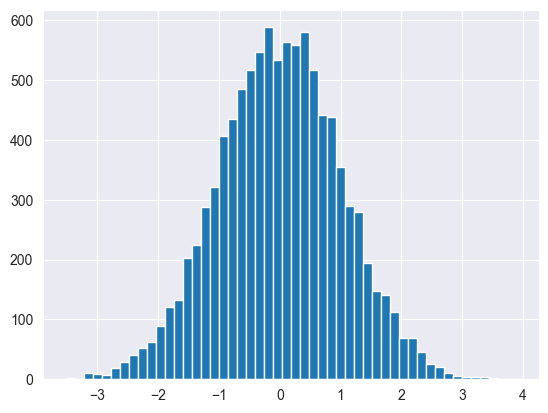

In [150]:
import matplotlib.pyplot as plt

plt.hist(x, bins=50)

1. 中位数

In [151]:
np.median(x)

0.0015149872607518981

2. 均值

In [152]:
np.mean(x)

-0.0030815283536774433

3. 方差与标准差

In [153]:
np.var(x)

1.0277333725899978

In [154]:
np.std(x)

1.0137718543094387